In [1]:
# !pip install -r requirements.txt

In [2]:
# !pip uninstall scikit-learn -y
# !pip install scikit-learn==0.23.2

In [3]:
import pandas as pd
import numpy as np

In [4]:
train = pd.read_csv('input/train.csv')
train.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,28,1,Travel_Frequently,Research & Development,6,4,Medical,1,2336,Male,...,5.0,Y,19,8,3,18.0,2,1,0,2
1,22,0,Travel_Rarely,Sales,6,4,Medical,1,3511,Female,...,9.0,Y,13,8,0,3.0,3,9,15,5
2,26,0,Travel_Rarely,Sales,14,4,Other,1,3209,Female,...,0.0,Y,11,8,3,4.0,3,8,6,0
3,40,0,Travel_Rarely,Human Resources,1,4,Life Sciences,1,3558,Male,...,5.0,Y,12,8,3,5.0,3,1,0,1
4,28,1,Travel_Frequently,Research & Development,9,3,Medical,1,4032,Male,...,5.0,Y,15,8,3,11.0,2,1,0,0


In [5]:
test = pd.read_csv('input/test.csv')
test.head()

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,JobLevel,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,27,Travel_Frequently,Sales,24,3,Life Sciences,1,4344,Male,3,...,1.0,Y,14,8,0,5.0,5,3,7,2
1,25,Travel_Rarely,Research & Development,7,3,Life Sciences,1,4408,Male,1,...,0.0,Y,12,8,0,9.0,3,4,0,2
2,32,Travel_Rarely,Research & Development,5,4,Technical Degree,1,2873,Female,2,...,8.0,Y,24,8,0,6.0,3,2,3,0
3,33,Travel_Rarely,Research & Development,6,3,Medical,1,2542,Male,2,...,3.0,Y,14,8,0,29.0,3,3,3,8
4,21,Travel_Rarely,Research & Development,2,2,Life Sciences,1,3739,Female,2,...,3.0,Y,12,8,0,3.0,1,3,3,2


In [6]:
submission = pd.read_csv('input/submission.csv')
submission.head()

,Attrition
0,0
1,0
2,0
3,0
4,0


In [7]:
train.describe()

,Age,Attrition,DistanceFromHome,Education,EmployeeCount,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
count,35000.000000,35000.000000,35000.000000,35000.000000,35000.0,35000.000000,35000.000000,35000.000000,33979.000000,35000.000000,35000.0,35000.000000,34199.000000,35000.000000,35000.000000,35000.000000,35000.000000
mean,29.567943,0.195943,5.713543,3.134514,1.0,3150.459657,2.005457,71783.247743,3.024515,15.165971,8.0,0.852714,8.802889,2.833686,4.166400,2.323200,3.624343
std,7.741643,0.396930,6.244575,0.998022,0.0,1144.133678,1.223712,47855.047498,2.671635,3.536202,0.0,0.937849,6.631972,1.414324,3.793782,3.456579,2.792156
min,18.000000,0.000000,1.000000,1.000000,1.0,3.000000,1.000000,10100.000000,0.000000,11.000000,8.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,24.000000,0.000000,1.000000,2.000000,1.0,2443.000000,1.000000,34454.500000,1.000000,13.000000,8.0,0.000000,4.000000,2.000000,2.000000,0.000000,2.000000
50%,28.000000,0.000000,3.000000,3.000000,1.0,3438.000000,2.000000,59572.500000,3.000000,14.000000,8.0,1.000000,8.000000,3.000000,3.000000,1.000000,2.000000
75%,34.000000,0.000000,7.000000,4.000000,1.0,4146.000000,2.000000,91604.250000,5.000000,17.000000,8.0,1.000000,11.000000,3.000000,5.000000,3.000000,6.000000
max,60.000000,1.000000,29.000000,5.000000,1.0,4410.000000,5.000000,199982.000000,9.000000,25.000000,8.0,3.000000,40.000000,6.000000,40.000000,15.000000,17.000000


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35000 entries, 0 to 34999
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      35000 non-null  int64  
 1   Attrition                35000 non-null  int64  
 2   BusinessTravel           35000 non-null  object 
 3   Department               35000 non-null  object 
 4   DistanceFromHome         35000 non-null  int64  
 5   Education                35000 non-null  int64  
 6   EducationField           35000 non-null  object 
 7   EmployeeCount            35000 non-null  int64  
 8   EmployeeID               35000 non-null  int64  
 9   Gender                   35000 non-null  object 
 10  JobLevel                 35000 non-null  int64  
 11  JobRole                  35000 non-null  object 
 12  MaritalStatus            35000 non-null  object 
 13  MonthlyIncome            35000 non-null  int64  
 14  NumCompaniesWorked    

In [9]:
columns_to_be_dropped = []
for i in train:
  if len(train[i].unique())==1:
    columns_to_be_dropped.append(i)

train.drop(columns=columns_to_be_dropped, inplace=True)
test.drop(columns=columns_to_be_dropped, inplace=True)

In [10]:
train.isnull().sum()

Age                           0
Attrition                     0
BusinessTravel                0
Department                    0
DistanceFromHome              0
Education                     0
EducationField                0
EmployeeID                    0
Gender                        0
JobLevel                      0
JobRole                       0
MaritalStatus                 0
MonthlyIncome                 0
NumCompaniesWorked         1021
PercentSalaryHike             0
StockOptionLevel              0
TotalWorkingYears           801
TrainingTimesLastYear         0
YearsAtCompany                0
YearsSinceLastPromotion       0
YearsWithCurrManager          0
dtype: int64

In [11]:
import matplotlib.pyplot as plt

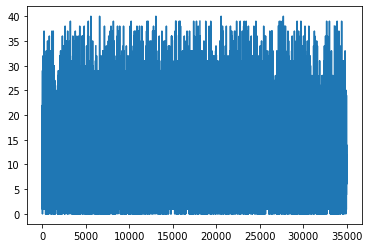

In [12]:
plt.plot(train['TotalWorkingYears'])

In [13]:
train.fillna(0, inplace=True)
train.fillna(0, inplace=True)

In [14]:
test.isnull().sum()

Age                          0
BusinessTravel               0
Department                   0
DistanceFromHome             0
Education                    0
EducationField               0
EmployeeID                   0
Gender                       0
JobLevel                     0
JobRole                      0
MaritalStatus                0
MonthlyIncome                0
NumCompaniesWorked         432
PercentSalaryHike            0
StockOptionLevel             0
TotalWorkingYears          314
TrainingTimesLastYear        0
YearsAtCompany               0
YearsSinceLastPromotion      0
YearsWithCurrManager         0
dtype: int64

In [15]:
test.fillna(test['TotalWorkingYears'].mean(), inplace=True)
test.fillna(test['NumCompaniesWorked'].mean(), inplace=True)

In [16]:
numeric_features=['Age', 'DistanceFromHome', 'Education', 'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike', 'TotalWorkingYears', 'TrainingTimesLastYear'], 
categorical_features=['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobLevel', 'JobRole', 'MaritalStatus', 'StockOptionLevel', 'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

In [17]:
from sklearn.preprocessing import LabelEncoder

In [18]:
encoder = LabelEncoder()

In [19]:
train['BusinessTravel']=encoder.fit_transform(train['BusinessTravel'])
test['BusinessTravel']=encoder.transform(test['BusinessTravel'])

train['Department']=encoder.fit_transform(train['Department'])
test['Department']=encoder.transform(test['Department'])

train['EducationField']=encoder.fit_transform(train['EducationField'])
test['EducationField']=encoder.transform(test['EducationField'])

train['Gender']=encoder.fit_transform(train['Gender'])
test['Gender']=encoder.transform(test['Gender'])

train['JobRole']=encoder.fit_transform(train['JobRole'])
test['JobRole']=encoder.transform(test['JobRole'])


train['MaritalStatus']=encoder.fit_transform(train['MaritalStatus'])
test['MaritalStatus']=encoder.transform(test['MaritalStatus'])

In [20]:
test.head()

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeID,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,27,1,2,24,3,1,4344,1,3,2,0,76762,1.0,14,0,5.0,5,3,7,2
1,25,2,1,7,3,1,4408,1,1,2,1,99768,0.0,12,0,9.0,3,4,0,2
2,32,2,1,5,4,5,2873,0,2,6,1,37067,8.0,24,0,6.0,3,2,3,0
3,33,2,1,6,3,3,2542,1,2,3,1,121141,3.0,14,0,29.0,3,3,3,8
4,21,2,1,2,2,1,3739,0,2,0,1,199770,3.0,12,0,3.0,1,3,3,2


In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X = train.loc[:, train.columns!='Attrition']
y = train['Attrition']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

In [24]:
# from pycaret.classification import setup, compare_models, evaluate_model, predict_model, save_model

In [25]:
# s = setup(train, target='Attrition', train_size=0.9999)

In [26]:
# best = compare_models()

In [27]:
# evaluate_model(best)

In [38]:
from sklearn.linear_model import LogisticRegression

In [39]:
model = LogisticRegression()

In [40]:
model.fit(X_train, y_train)

LogisticRegression()

In [41]:
pred = model.predict(X_test)

In [42]:
from sklearn.metrics import accuracy_score

In [43]:
accuracy_score(y_test, pred)

0.806952380952381

In [44]:
model.fit(X, y)

LogisticRegression()

In [45]:
pred = model.predict(test)

In [46]:
res = pd.DataFrame({'Attrition': pred})
res.to_csv('output/submission.csv', index=False)

In [47]:
len(pred)

15000